# ramanchada: Generate & assign new x axis to spectrum

In [1]:
from ramanchada.classes import RamanChada, make_test_RamanChada

### 1. From pixels to wavelength/wavenumber via neon calibration

Load a Neon spectrum

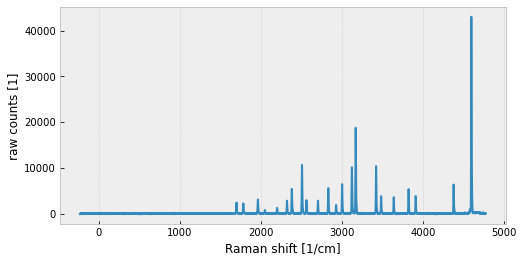

In [2]:
neon = RamanChada(r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\ramanchada\src\ramanchada\testdata\neon\Neon_S120_x20_7000msx15.cha")
neon.plot()

Let's locate some peaks for later use.

In [3]:
neon.peaks(sort_by='position')
neon.bands

,position,intensity,prominence,FWHM,Gauss area,voigt fitted position,voigt fitted FWHM,voigt fitted area
0,4594.66,43026.0,0.997029,7.490443,343063.405511,4594.973173,6.827080,311050.410391
1,4376.11,6354.0,0.139231,7.387075,49963.820522,4376.270591,6.052062,41278.835874
2,3908.19,3849.0,0.087434,7.698140,31540.578036,3908.288909,6.523657,26876.619298
3,3819.83,5286.0,0.121833,7.902997,44468.747794,3820.411552,6.645298,38857.714790
4,3637.86,3596.0,0.083609,7.773958,29757.590553,3637.695856,6.597236,26105.131254
5,3483.16,3794.0,0.085819,8.159575,32953.442568,3482.789850,7.050982,28563.228091
6,3420.61,10375.0,0.232143,8.172748,90259.334965,3420.261011,6.777666,76750.194405
7,3168.49,18752.0,0.425170,8.553003,170726.958916,3168.849880,7.438517,147690.346385
8,3122.16,10143.0,0.237590,9.121475,98484.392940,3121.829379,8.305841,89156.919717
9,3001.76,6452.0,0.146245,8.578419,58916.576437,3001.689399,7.372596,51193.586947




We now deliberately get rid of the x axis by resetting it to channel #. This results in a spectrum "with no x axis".


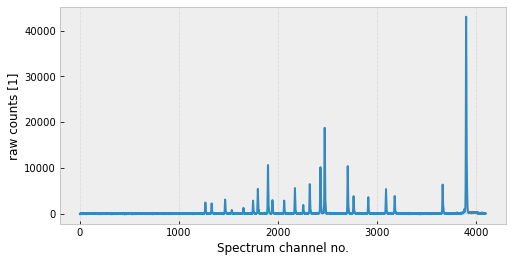

In [4]:
neon.reset_x()
neon.plot()



Each found peak has an index. We can now generate a new x axis by using the method make_x_axis and telling it the true position in 1/cm for at least two of the peaks.


In [8]:
neon_x_axis = neon.make_x_axis({0: 4594.66, 5: 3483.16, 11:	2703.89, 17: 1699.37}, x_unit='wavenumber [1/cm]')



neon_x_axis is the x axis, stored as a RamanCalibration class instance.


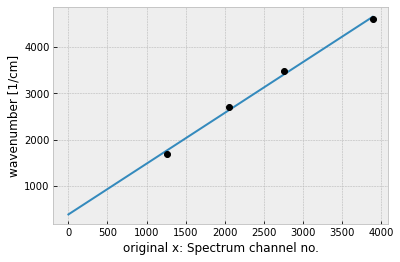

In [9]:
neon_x_axis.show()

### 2. From wavelength/wavenumber to Raman shift via Silicon laser zeroing

Load a Si spectrum (from LBF's heavily decalibrated instrument)

x-y(1)


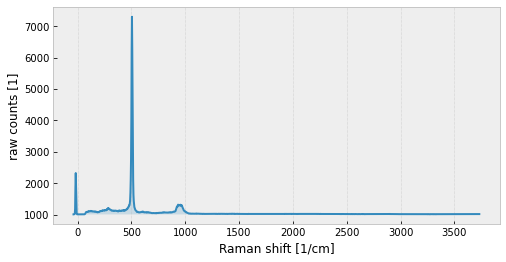

In [15]:
si_file = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\ramanchada\src\ramanchada\testdata\S0N_WITEcAlpha532_100x_075_10000ms_000_Spec.Data 1.spc"
si = RamanChada(si_file)
si.plot()

Determine the position of the 520.45 1/cm Si peak by fitting a Voigt distribution.

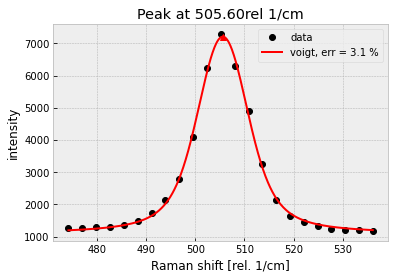

,position,intensity,prominence,FWHM,Gauss area,voigt fitted position,voigt fitted FWHM,voigt fitted area
0,505.19165,7302.0,0.978329,18.243436,141802.658834,505.601457,12.433381,80993.430109


In [17]:
si.peaks(x_min=450, x_max=700, show=True)
si.bands

It was found at 505.19 1/cm. The delta is 15.25 1/cm.

In [18]:
delta = 520.45 - si.bands.position[0]
delta

15.258349609375045

Assign delta to the *.x_offset_value* attribute of the *x axis* object:

In [19]:
neon_x_axis.x_offset_value = 15.258

The axis is now offset accordingly:

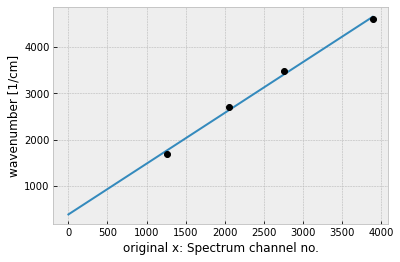

In [28]:
neon_x_axis.show()



We can now store this x_axis (.save() method) and apply it to new spectra:


In [24]:
r = make_test_RamanChada()

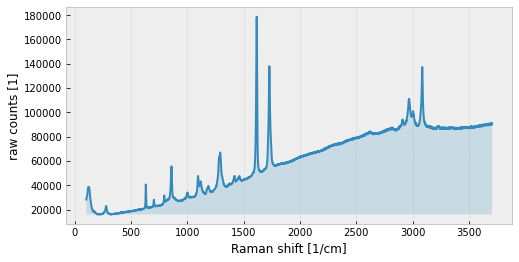

In [25]:
r.plot()

In [26]:
r.assign_x(neon_x_axis)

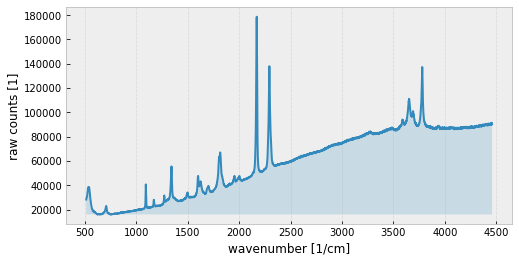

In [27]:
r.plot()

### 3. Finetuned adjustment using polystyrene

Load PS spectrum:

In [54]:
ps_file = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\ramanchada\src\ramanchada\testdata\Polystyrene.spc"
ps = RamanChada(ps_file)

gx-y(1)


At this point, one would first assign the x axis:

*ps.assign_x(neon_x_axis)*

Since the example x axis is totally wrong and does not apply to this instrument, this step is skipped here.

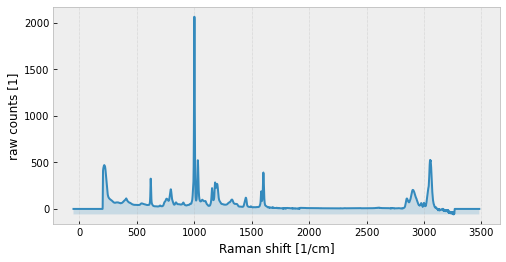

In [55]:
ps.plot()

Get rid of Rayleigh filter artifacts:

In [56]:
ps.x_crop(250, 3200)
ps.normalize()

Define "official" PS peak positions:

In [57]:
ps_positions = [221.,	
407,
543	,
620.9,	
795.8,	
1001.4,	
1031.8,	
1155.3,	
1450.5,	
1583.1,	
1602.3,	
2852.4,	
2904.5,	
3054.3]	

Using those and the measured spectrum, generate *RamanCalibration* object:

list


\\vm-stor-51\alle\projekte kunststoffe\rd\ma\öffentliche_projekte\2020-01-07_230007_h2020-charisma_barton\python\charisma-raman-spectrum-harmonization\ramanchada\src\ramanchada\analysis\peaks.py:74: PeakPropertyWarning: some peaks have a prominence of 0
  w, _, _, _ = peak_widths(s, p, rel_height=rel_height)
\\vm-stor-51\alle\projekte kunststoffe\rd\ma\öffentliche_projekte\2020-01-07_230007_h2020-charisma_barton\python\charisma-raman-spectrum-harmonization\ramanchada\src\ramanchada\analysis\peaks.py:74: PeakPropertyWarning: some peaks have a width of 0
  w, _, _, _ = peak_widths(s, p, rel_height=rel_height)


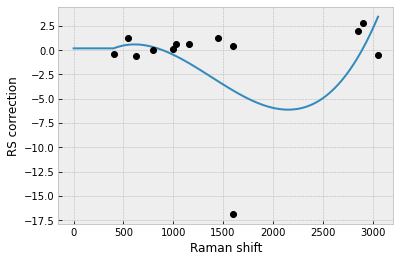

In [58]:
ps_cal = ps.make_x_calibration(reference=ps_positions, fitmethod='par')
ps_cal.show()

Now, we can "finetune" the x axis calibration.

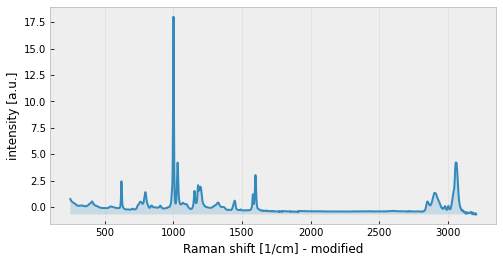

In [59]:
ps.calibrate(ps_cal)
ps.plot()